In [1]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive" /content/gdrive

Mounted at /content/drive


In [3]:
cd gdrive/B3

/content/drive/My Drive/B3


## 必要なライブラリのダウンロード

In [2]:
import numpy as np                                                             #数値計算のライブラリ
import pandas as pd                                                            #データ分析のライブラリ
import matplotlib.pyplot as plt                                              #グラフ描画のライブラリ
import seaborn as sns                                                          #データを可視化するライブラリ
import sklearn                                                                      #機械学習のライブラリ
from sklearn.datasets import load_iris                                   #irisデータを読み込む
from tensorflow.keras.utils import to_categorical                   #one-hotベクトル化を行う
from sklearn import preprocessing                                        #標準化処理
from sklearn.model_selection import train_test_split               #トレーニングデータとテストデータに分割する
from tensorflow.keras.models import Model                           #モデルの宣言
from tensorflow.keras.layers import Dense                             #全結合層
from tensorflow.keras.models import model_from_json           #モデルの保存と読み込み
from tensorflow.keras.utils import plot_model                         #モデルの可視化
from tensorflow.keras.layers import concatenate,add              # モデルの結合用
from tensorflow.keras.callbacks import EarlyStopping             # 学習の早期終了
from tensorflow.keras.layers import Dropout                           # ドロップアウト
from tensorflow.keras.layers import Input                                # モデルの入力用
from tensorflow.keras.callbacks import ModelCheckpoint         # 裁量のモデルの保存用
from tensorflow.python.keras.models import load_model          # モデルの保存用
sns.set()                                                                                 # matplotlibのplotをseabornのスタイルにする

## irisデータの収集

In [3]:
iris = load_iris()

In [4]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## irisデータの前処理

In [8]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
 iris.target.shape
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
df["label"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### データの可視化

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


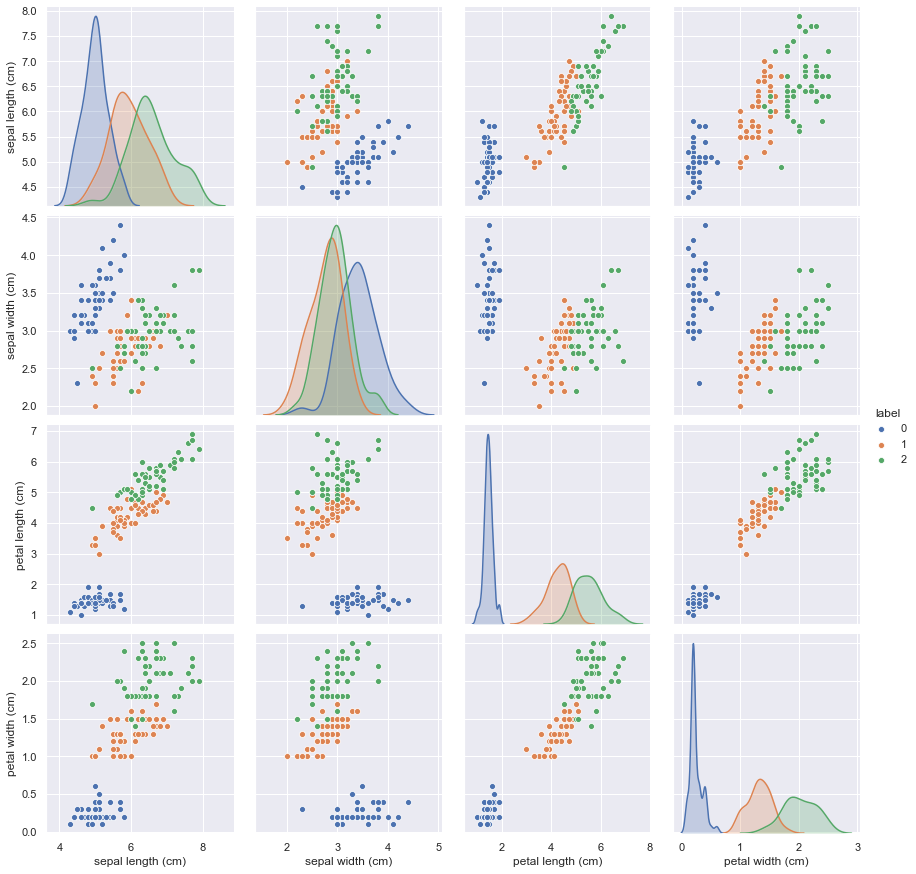

In [12]:
#データの可視化
sns.pairplot(df, hue="label", size=3)

In [13]:
df.columns
df[(df["label"] == 1) | (df["label"]==2)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
# df["new"] = df["sepal length (cm)"] + df["sepal width (cm)"]
df.drop("new", axis = 1, inplace =True)

KeyError: "['new'] not found in axis"

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


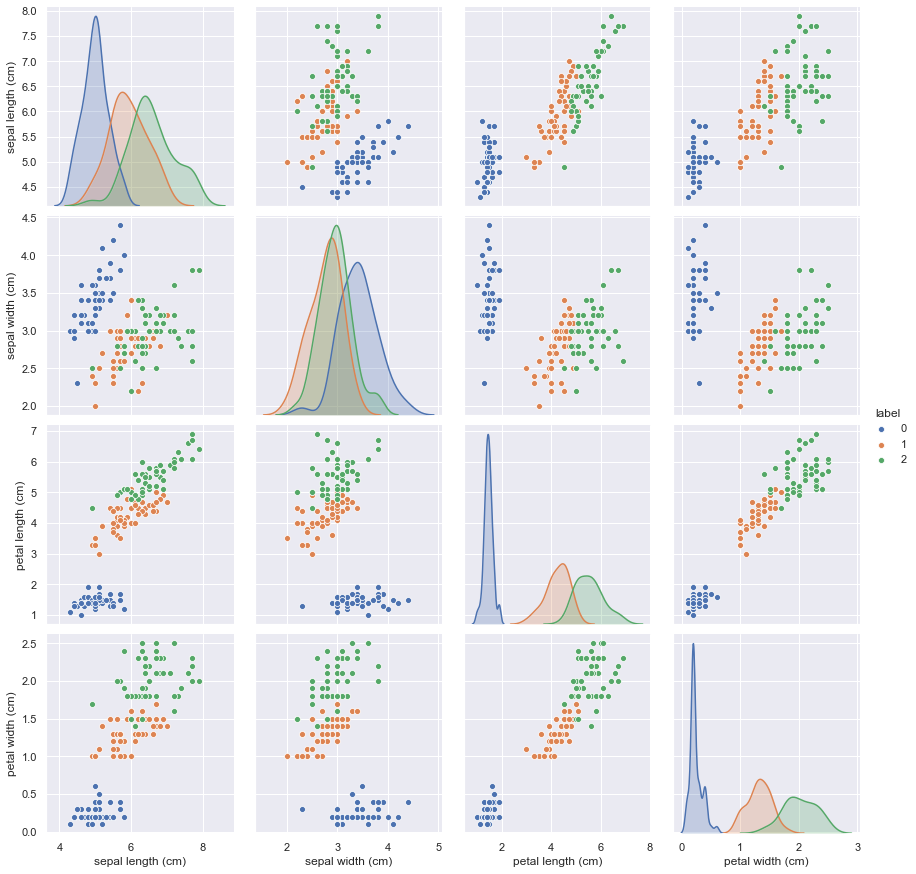

In [16]:
#データの可視化
sns.pairplot(df, hue="label", size=3)

#### データの相関係数



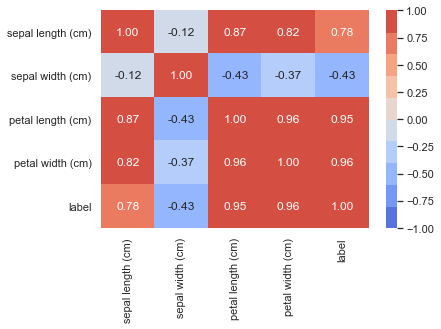

In [17]:
cor = df[['sepal length (cm)',
              'sepal width (cm)',
              'petal length (cm)',
              'petal width (cm)',
              'label']].corr()
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [18]:
df.iloc[:,0:-1].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
# df.iloc[行, 列]
df[(df["petal length (cm)"]<=2.0) & (df["label"]==0)]
df["label"] == 2

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: label, Length: 150, dtype: bool

In [20]:
df.iloc[:,-1]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64

# 前処理

In [21]:
data_X = preprocessing.scale(df.iloc[:,0:-1])#標準化
data_y = to_categorical(df.iloc[:,-1])#one-hotベクトル化

In [31]:
data_X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [23]:
data_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [24]:
data_X[:,0]

array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
       -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
       -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
       -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
       -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
       -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
       -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
       -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
       -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
        1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
       -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
       -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
        1.03800476, -0.29484182, -0.05250608,  0.4321654 , -0.29

(array([ 1.,  3.,  1.,  0.,  4.,  2.,  5.,  0.,  6., 10.,  0.,  9.,  4.,
         1.,  0.,  6.,  7.,  0.,  6.,  8.,  7.,  0.,  3.,  6.,  6.,  0.,
         4.,  9.,  0.,  7.,  5.,  2.,  0.,  8.,  3.,  0.,  4.,  1.,  1.,
         0.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  4.,  0.,  1.]),
 array([-1.87002413, -1.78278327, -1.6955424 , -1.60830153, -1.52106067,
        -1.4338198 , -1.34657893, -1.25933807, -1.1720972 , -1.08485633,
        -0.99761547, -0.9103746 , -0.82313373, -0.73589287, -0.648652  ,
        -0.56141113, -0.47417027, -0.3869294 , -0.29968853, -0.21244767,
        -0.1252068 , -0.03796593,  0.04927493,  0.1365158 ,  0.22375667,
         0.31099753,  0.3982384 ,  0.48547927,  0.57272013,  0.659961  ,
         0.74720187,  0.83444273,  0.9216836 ,  1.00892447,  1.09616533,
         1.1834062 ,  1.27064707,  1.35788793,  1.4451288 ,  1.53236967,
         1.61961053,  1.7068514 ,  1.79409227,  1.88133314,  1.968574  ,
         2.05581487,  2.14305574,  2.2302966 ,  2.31753747,

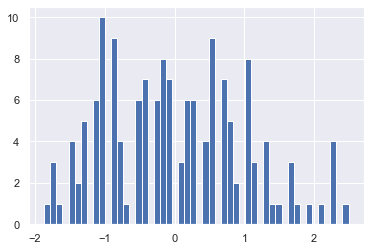

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(data_X[:,0], bins=50)

(array([ 1.,  3.,  1.,  0.,  4.,  2.,  5.,  0.,  6., 10.,  0.,  9.,  4.,
         1.,  0.,  6.,  7.,  0.,  6.,  8.,  7.,  0.,  3.,  6.,  0.,  6.,
         4.,  9.,  0.,  7.,  5.,  2.,  0.,  8.,  3.,  0.,  4.,  1.,  1.,
         0.,  3.,  1.,  0.,  1.,  0.,  1.,  0.,  4.,  0.,  1.]),
 array([4.3  , 4.372, 4.444, 4.516, 4.588, 4.66 , 4.732, 4.804, 4.876,
        4.948, 5.02 , 5.092, 5.164, 5.236, 5.308, 5.38 , 5.452, 5.524,
        5.596, 5.668, 5.74 , 5.812, 5.884, 5.956, 6.028, 6.1  , 6.172,
        6.244, 6.316, 6.388, 6.46 , 6.532, 6.604, 6.676, 6.748, 6.82 ,
        6.892, 6.964, 7.036, 7.108, 7.18 , 7.252, 7.324, 7.396, 7.468,
        7.54 , 7.612, 7.684, 7.756, 7.828, 7.9  ]),
 <a list of 50 Patch objects>)

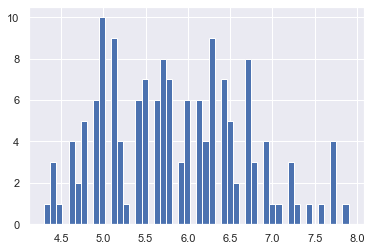

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df.iloc[:,0], bins=50)

In [40]:
data_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# トレーニングデータとテストデータの分割

In [79]:
#トレーニングデータとテストデータに分類 8:2


X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, 
                                                                        test_size=0.2,
                                                                        random_state = 2,
                                                                       shuffle = True)

In [80]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [81]:
X_train.shape

(120, 4)

In [82]:
X_test.shape

(30, 4)

In [83]:
y_train.shape

(120, 3)

In [84]:
y_test.shape

(30, 3)

## モデルの構築

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


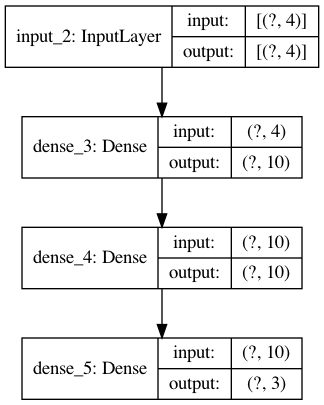

In [95]:
#簡単な3層のモデルの実装



i =  Input(shape=(X_train.shape[1]))
x = Dense(10, activation="relu" )(i)
x =  Dense(10, activation="relu" )(x)
x = Dense(y_train.shape[1], activation="softmax")(x)
model1 = Model(i,x)
model1.compile( loss="categorical_crossentropy",
                       optimizer="adam", metrics=['accuracy'])



model1.summary()
plot_model(
    model1,
    show_shapes=True,
)


In [96]:
history1 = model1.fit(X_train,y_train,
                   epochs=20,
                    validation_split=0.2,
                    verbose=2
                   )

Epoch 1/20
3/3 - 0s - loss: 1.0125 - accuracy: 0.3542 - val_loss: 0.9970 - val_accuracy: 0.3333
Epoch 2/20
3/3 - 0s - loss: 1.0025 - accuracy: 0.3646 - val_loss: 0.9868 - val_accuracy: 0.3750
Epoch 3/20
3/3 - 0s - loss: 0.9927 - accuracy: 0.4271 - val_loss: 0.9777 - val_accuracy: 0.4583
Epoch 4/20
3/3 - 0s - loss: 0.9837 - accuracy: 0.4688 - val_loss: 0.9692 - val_accuracy: 0.5000
Epoch 5/20
3/3 - 0s - loss: 0.9747 - accuracy: 0.5000 - val_loss: 0.9610 - val_accuracy: 0.5000
Epoch 6/20
3/3 - 0s - loss: 0.9668 - accuracy: 0.5104 - val_loss: 0.9530 - val_accuracy: 0.5417
Epoch 7/20
3/3 - 0s - loss: 0.9592 - accuracy: 0.5312 - val_loss: 0.9454 - val_accuracy: 0.5833
Epoch 8/20
3/3 - 0s - loss: 0.9518 - accuracy: 0.5417 - val_loss: 0.9381 - val_accuracy: 0.5833
Epoch 9/20
3/3 - 0s - loss: 0.9449 - accuracy: 0.5729 - val_loss: 0.9311 - val_accuracy: 0.5833
Epoch 10/20
3/3 - 0s - loss: 0.9385 - accuracy: 0.6146 - val_loss: 0.9244 - val_accuracy: 0.7083
Epoch 11/20
3/3 - 0s - loss: 0.9318 - a

In [97]:
history1.history

{'loss': [1.01254141330719,
  1.0025157928466797,
  0.9927294254302979,
  0.9837203025817871,
  0.9746991991996765,
  0.9668208956718445,
  0.9591584205627441,
  0.9517888426780701,
  0.9448923468589783,
  0.9384503364562988,
  0.9317710399627686,
  0.9251052737236023,
  0.9186685085296631,
  0.9124863147735596,
  0.9064726829528809,
  0.9004842638969421,
  0.8944705128669739,
  0.8884544372558594,
  0.8822377324104309,
  0.8761810660362244],
 'accuracy': [0.3541666567325592,
  0.3645833432674408,
  0.4270833432674408,
  0.46875,
  0.5,
  0.5104166865348816,
  0.53125,
  0.5416666865348816,
  0.5729166865348816,
  0.6145833134651184,
  0.6354166865348816,
  0.6770833134651184,
  0.6875,
  0.6875,
  0.7291666865348816,
  0.7395833134651184,
  0.75,
  0.75,
  0.7604166865348816,
  0.7604166865348816],
 'val_loss': [0.9969564080238342,
  0.9867844581604004,
  0.9777343273162842,
  0.9692417979240417,
  0.9609899520874023,
  0.9529891610145569,
  0.9454053044319153,
  0.9381048679351807,
 

In [98]:
accuracy = history1.history["accuracy"]
loss = history1.history["loss"]
epochs = range(1, len(loss) + 1)

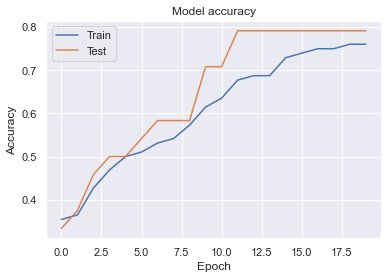

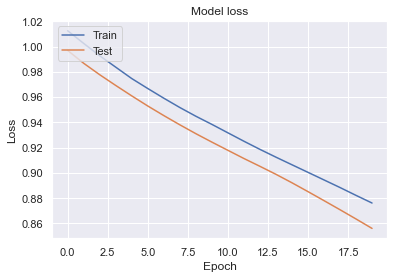

In [101]:
# Plot training & validation accuracy values
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [102]:
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("loss:"+str(loss))
print("accuracy:"+str(accuracy))

loss:0.9012902975082397
accuracy:0.800000011920929


## モデルの再構築

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 303       
Total params: 10,903
Trainable params: 10,903
Non-trainable params: 0
_________________________________________________________________


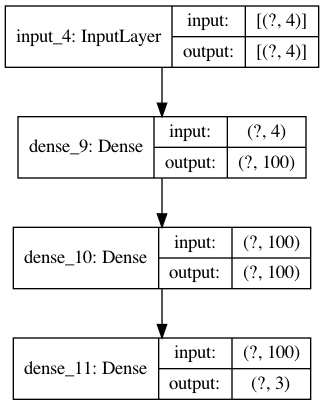

In [108]:
i =  Input(shape=(X_train.shape[1]))
x = Dense(100, activation="relu" )(i)
x =  Dense(100, activation="relu" )(x)
x = Dense(y_train.shape[1], activation="softmax")(x)
model2 = Model(i,x)
model2.compile( loss="categorical_crossentropy",
                       optimizer="adam", metrics=['accuracy'])
model2.summary()
plot_model(
    model2,
    show_shapes=True,
)

## 再構築モデルの評価

### トレーニングデータの精度

In [109]:
history2 = model2.fit(X_train,y_train,
                                epochs=1000,
                                validation_split = 0.2,
                                verbose=2)

Epoch 1/1000
3/3 - 0s - loss: 1.1225 - accuracy: 0.4479 - val_loss: 0.9485 - val_accuracy: 0.6250
Epoch 2/1000
3/3 - 0s - loss: 1.0017 - accuracy: 0.5521 - val_loss: 0.8306 - val_accuracy: 0.6667
Epoch 3/1000
3/3 - 0s - loss: 0.8939 - accuracy: 0.6562 - val_loss: 0.7358 - val_accuracy: 0.9167
Epoch 4/1000
3/3 - 0s - loss: 0.8029 - accuracy: 0.8229 - val_loss: 0.6601 - val_accuracy: 0.8333
Epoch 5/1000
3/3 - 0s - loss: 0.7308 - accuracy: 0.8021 - val_loss: 0.5994 - val_accuracy: 0.8333
Epoch 6/1000
3/3 - 0s - loss: 0.6682 - accuracy: 0.8438 - val_loss: 0.5495 - val_accuracy: 0.8333
Epoch 7/1000
3/3 - 0s - loss: 0.6137 - accuracy: 0.8333 - val_loss: 0.5076 - val_accuracy: 0.8333
Epoch 8/1000
3/3 - 0s - loss: 0.5674 - accuracy: 0.8438 - val_loss: 0.4725 - val_accuracy: 0.7917
Epoch 9/1000
3/3 - 0s - loss: 0.5269 - accuracy: 0.8438 - val_loss: 0.4420 - val_accuracy: 0.7917
Epoch 10/1000
3/3 - 0s - loss: 0.4914 - accuracy: 0.8333 - val_loss: 0.4154 - val_accuracy: 0.7917
Epoch 11/1000
3/3 -

Epoch 84/1000
3/3 - 0s - loss: 0.0517 - accuracy: 0.9792 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 85/1000
3/3 - 0s - loss: 0.0517 - accuracy: 0.9792 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 86/1000
3/3 - 0s - loss: 0.0515 - accuracy: 0.9792 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 87/1000
3/3 - 0s - loss: 0.0503 - accuracy: 0.9896 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 88/1000
3/3 - 0s - loss: 0.0504 - accuracy: 0.9896 - val_loss: 0.0386 - val_accuracy: 0.9583
Epoch 89/1000
3/3 - 0s - loss: 0.0501 - accuracy: 0.9896 - val_loss: 0.0360 - val_accuracy: 1.0000
Epoch 90/1000
3/3 - 0s - loss: 0.0492 - accuracy: 0.9896 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 91/1000
3/3 - 0s - loss: 0.0497 - accuracy: 0.9896 - val_loss: 0.0326 - val_accuracy: 1.0000
Epoch 92/1000
3/3 - 0s - loss: 0.0484 - accuracy: 0.9896 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 93/1000
3/3 - 0s - loss: 0.0491 - accuracy: 0.9792 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 94/1

3/3 - 0s - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0197 - val_accuracy: 1.0000
Epoch 167/1000
3/3 - 0s - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 168/1000
3/3 - 0s - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0184 - val_accuracy: 1.0000
Epoch 169/1000
3/3 - 0s - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 170/1000
3/3 - 0s - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 171/1000
3/3 - 0s - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0200 - val_accuracy: 1.0000
Epoch 172/1000
3/3 - 0s - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0193 - val_accuracy: 1.0000
Epoch 173/1000
3/3 - 0s - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 174/1000
3/3 - 0s - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.0219 - val_accuracy: 1.0000
Epoch 175/1000
3/3 - 0s - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 176/1000


3/3 - 0s - loss: 0.0187 - accuracy: 0.9896 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 249/1000
3/3 - 0s - loss: 0.0174 - accuracy: 0.9896 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 250/1000
3/3 - 0s - loss: 0.0177 - accuracy: 0.9896 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 251/1000
3/3 - 0s - loss: 0.0175 - accuracy: 0.9896 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 252/1000
3/3 - 0s - loss: 0.0173 - accuracy: 0.9896 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 253/1000
3/3 - 0s - loss: 0.0169 - accuracy: 0.9896 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 254/1000
3/3 - 0s - loss: 0.0170 - accuracy: 0.9896 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 255/1000
3/3 - 0s - loss: 0.0171 - accuracy: 0.9896 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 256/1000
3/3 - 0s - loss: 0.0164 - accuracy: 0.9896 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 257/1000
3/3 - 0s - loss: 0.0161 - accuracy: 0.9896 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 258/1000


Epoch 331/1000
3/3 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 332/1000
3/3 - 0s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 333/1000
3/3 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 334/1000
3/3 - 0s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 335/1000
3/3 - 0s - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 336/1000
3/3 - 0s - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 337/1000
3/3 - 0s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 338/1000
3/3 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 339/1000
3/3 - 0s - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 340/1000
3/3 - 0s - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000


Epoch 413/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 414/1000
3/3 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 415/1000
3/3 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 416/1000
3/3 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 417/1000
3/3 - 0s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 418/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 419/1000
3/3 - 0s - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 420/1000
3/3 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 421/1000
3/3 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 422/1000
3/3 - 0s - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000


Epoch 495/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 496/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 497/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 498/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 499/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 500/1000
3/3 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 501/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 502/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 503/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 504/1000
3/3 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000


Epoch 577/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 578/1000
3/3 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 579/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 580/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 581/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 582/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 583/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 584/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 585/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 586/1000
3/3 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000


Epoch 657/1000
3/3 - 0s - loss: 6.8149e-04 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 658/1000
3/3 - 0s - loss: 6.7148e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 659/1000
3/3 - 0s - loss: 6.7751e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 660/1000
3/3 - 0s - loss: 6.6966e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 661/1000
3/3 - 0s - loss: 6.6743e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 662/1000
3/3 - 0s - loss: 6.7412e-04 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 663/1000
3/3 - 0s - loss: 6.6168e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 664/1000
3/3 - 0s - loss: 6.5131e-04 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 665/1000
3/3 - 0s - loss: 6.4737e-04 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 666/1000
3/3 - 0s - loss: 6.4711e-04 - accuracy: 1.0000 - 

Epoch 736/1000
3/3 - 0s - loss: 4.6347e-04 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 737/1000
3/3 - 0s - loss: 4.6448e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 738/1000
3/3 - 0s - loss: 4.6015e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 739/1000
3/3 - 0s - loss: 4.5830e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 740/1000
3/3 - 0s - loss: 4.5578e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 741/1000
3/3 - 0s - loss: 4.5479e-04 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 742/1000
3/3 - 0s - loss: 4.5283e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 743/1000
3/3 - 0s - loss: 4.5316e-04 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 744/1000
3/3 - 0s - loss: 4.4832e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 745/1000
3/3 - 0s - loss: 4.4782e-04 - accuracy: 1.0000 - 

Epoch 815/1000
3/3 - 0s - loss: 3.3294e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 816/1000
3/3 - 0s - loss: 3.3209e-04 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 817/1000
3/3 - 0s - loss: 3.2953e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 818/1000
3/3 - 0s - loss: 3.2743e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 819/1000
3/3 - 0s - loss: 3.2689e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 820/1000
3/3 - 0s - loss: 3.2619e-04 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 821/1000
3/3 - 0s - loss: 3.2632e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 822/1000
3/3 - 0s - loss: 3.2344e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 823/1000
3/3 - 0s - loss: 3.2192e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 824/1000
3/3 - 0s - loss: 3.2244e-04 - accuracy: 1.0000 - 

Epoch 894/1000
3/3 - 0s - loss: 2.4678e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 895/1000
3/3 - 0s - loss: 2.4778e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 896/1000
3/3 - 0s - loss: 2.4675e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 897/1000
3/3 - 0s - loss: 2.4590e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 898/1000
3/3 - 0s - loss: 2.4397e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 899/1000
3/3 - 0s - loss: 2.4264e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 900/1000
3/3 - 0s - loss: 2.4247e-04 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 901/1000
3/3 - 0s - loss: 2.4395e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 902/1000
3/3 - 0s - loss: 2.4106e-04 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 903/1000
3/3 - 0s - loss: 2.4096e-04 - accuracy: 1.0000 - 

Epoch 973/1000
3/3 - 0s - loss: 1.9002e-04 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 974/1000
3/3 - 0s - loss: 1.8915e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 975/1000
3/3 - 0s - loss: 1.8795e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 976/1000
3/3 - 0s - loss: 1.8661e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 977/1000
3/3 - 0s - loss: 1.8642e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 978/1000
3/3 - 0s - loss: 1.8539e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 979/1000
3/3 - 0s - loss: 1.8539e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 980/1000
3/3 - 0s - loss: 1.8500e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 981/1000
3/3 - 0s - loss: 1.8414e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 982/1000
3/3 - 0s - loss: 1.8389e-04 - accuracy: 1.0000 - 

In [110]:
accuracy = history2.history["accuracy"]
loss = history2.history["loss"]
epochs = range(1, len(loss) + 1)

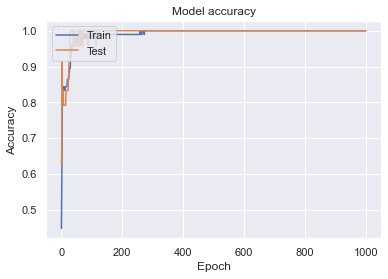

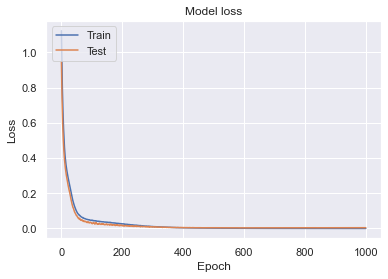

In [111]:
# Plot training & validation accuracy values
plt.plot(history2.history["accuracy"])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### テストデータで検証

In [112]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.21389566361904144
accuracy: 0.9666666388511658


In [133]:
y_pred = model2.predict(X_test)
y_pred

# y_list = y_pred.tolist()
# y_list

y_pred[0]

array([1.3306576e-11, 6.5786231e-11, 1.0000000e+00], dtype=float32)

In [131]:
# y_one = np.argmax(y_pred)
y_one = []

for i in range(len(y_pred)):
    y_one.append(np.argmax(y_pred[i]))

y_one

[2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2]

In [134]:
y_list

[[1.3306576326921338e-11, 6.578623062969413e-11, 1.0],
 [0.9999682903289795, 3.176360405632295e-05, 1.304160701460128e-21],
 [1.0424205986250823e-12, 4.698230693378491e-11, 1.0],
 [3.635687332247638e-15, 6.803330685270503e-14, 1.0],
 [2.641738173700392e-12, 1.0254953136668021e-10, 1.0],
 [1.2262617929081898e-05, 0.9999772310256958, 1.0435544027131982e-05],
 [1.0757114068837836e-05, 0.9934820532798767, 0.006507201585918665],
 [0.9999973773956299, 2.6799468741955934e-06, 9.089074898024429e-25],
 [0.9999963045120239, 3.6926310258422745e-06, 5.2929436540257975e-22],
 [4.022257144242758e-06, 0.0007361704483628273, 0.9992597699165344],
 [0.999996542930603, 3.4203346785943722e-06, 3.8859071667916856e-13],
 [1.0, 5.8816141290662927e-08, 7.374490523200103e-17],
 [0.9999997615814209, 2.9518801625272317e-07, 9.441992814777228e-14],
 [2.3619422790943645e-05, 0.9999077320098877, 6.869152275612578e-05],
 [3.1910922793088048e-09, 7.800013918313198e-06, 0.9999922513961792],
 [0.9999994039535522, 5.826

In [130]:
y_label = []

for i in range(len(y_list)):
    tmp = max(y_list[i])
    y_label.append(y_list[i].index(tmp))

y_label

[2,
 0,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2]

### ロジスティック回帰との比較

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import metrics

In [114]:
X_train, X_test, y_train, y_test = train_test_split( data_X, df.iloc[:,-1], 
                                                                        test_size=0.2,
                                                                        random_state=4)

In [115]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


## おまけ:モデルの保存と読み込み

In [107]:
# モデルの保存
model2.save("model.h5")

In [112]:
# モデルの読み込み
model_load = load_model("model.h5")
model_load.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_57 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_58 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 303       
Total params: 10,903
Trainable params: 10,903
Non-trainable params: 0
_________________________________________________________________


In [113]:
loss,accuracy = model_load.evaluate(X_train, y_train,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.0689430683851242
accuracy: 0.9666666388511658


## 演習問題

In [114]:
from sklearn.datasets import load_wine
wine = load_wine()

In [115]:
df2 = pd.DataFrame(wine.data, columns=wine.feature_names)

In [116]:
df2["label"]=wine.target

In [117]:
df2

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [118]:
sns.pairplot(df2, hue="label",size=3)

Output hidden; open in https://colab.research.google.com to view.

In [120]:
col = df2.columns

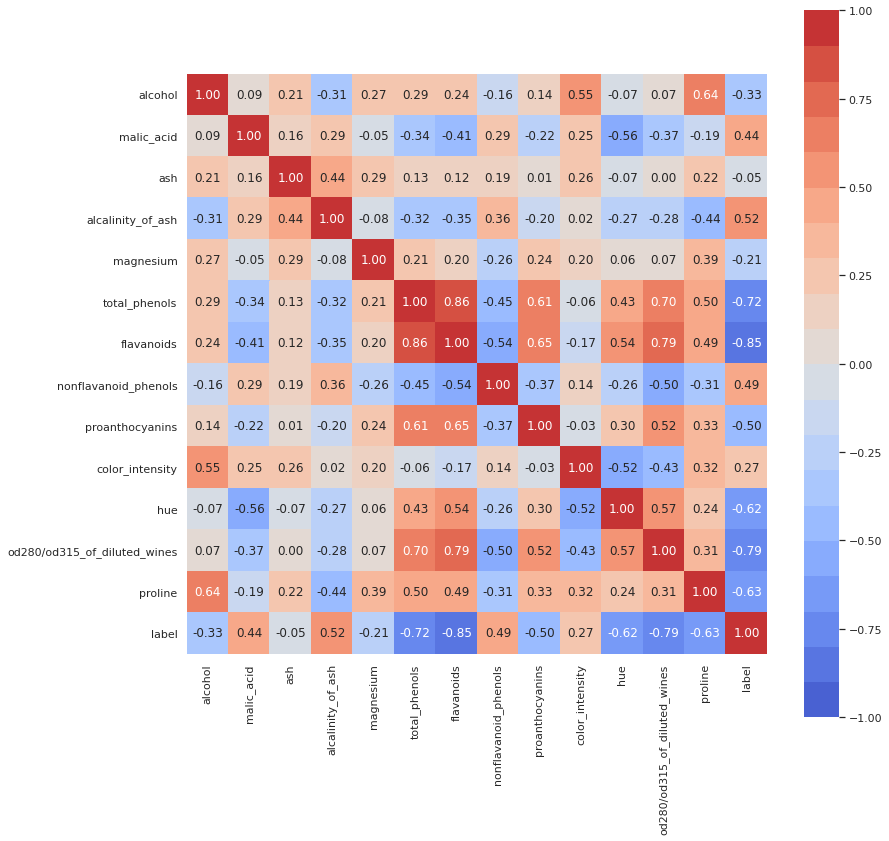

In [127]:
cor = df2[col].corr()
plt.subplots(figsize=(13,13))
sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 20), annot=True,fmt='.2f', vmin = -1, vmax = 1, square=True)

In [128]:
df2.iloc[:,0:-1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [132]:
# データ型の確認
df2.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
label                             int64
dtype: object

In [133]:
# 欠損値の確認
df2.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [ ]:
data_X2 = preprocessing.scale(df2.iloc[:,0:-1])#標準化
data_y2 = to_categorical(df2.iloc[:,-1])#one-hot　ベクトル化

data_X2.astype("float32")
data_y2.astype("int16")

In [146]:
#トレーニングデータとテストデータに分類


X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y2, 
                                                                      test_size=0.2, 
                                                                      random_state=1008)

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
dense_75 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_76 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_77 (Dense)             (None, 3)                 99        
Total params: 1,603
Trainable params: 1,603
Non-trainable params: 0
_________________________________________________________________


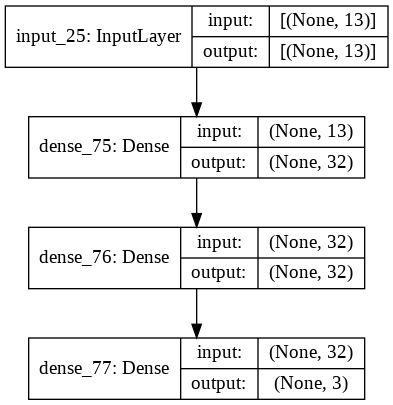

In [159]:
#簡単な3層のモデルの実装

i =  Input(shape=(X_train.shape[1]))
x = Dense(32, activation="relu" )(i)
x =  Dense(32, activation="relu" )(x)
x = Dense(y_train.shape[1], activation="softmax")(x)
model = Model(i,x)
model.compile( loss="categorical_crossentropy",
                       optimizer="adam", metrics=['accuracy'])
model.summary()
plot_model(
    model,
    show_shapes=True,
)


In [160]:
checkpoint = ModelCheckpoint(filepath = 'model_wine.h5',
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

In [161]:
history3 = model.fit(X_train,y_train,
                                epochs=200,
                                validation_split = 0.1,
                                verbose=2,
                                 callbacks = [checkpoint] )

Epoch 1/200
4/4 - 1s - loss: 1.2002 - accuracy: 0.2520 - val_loss: 1.2407 - val_accuracy: 0.2000

Epoch 00001: val_loss improved from inf to 1.24069, saving model to model_wine.h5
Epoch 2/200
4/4 - 0s - loss: 1.1055 - accuracy: 0.3228 - val_loss: 1.1606 - val_accuracy: 0.2667

Epoch 00002: val_loss improved from 1.24069 to 1.16059, saving model to model_wine.h5
Epoch 3/200
4/4 - 0s - loss: 1.0208 - accuracy: 0.4961 - val_loss: 1.0831 - val_accuracy: 0.4000

Epoch 00003: val_loss improved from 1.16059 to 1.08315, saving model to model_wine.h5
Epoch 4/200
4/4 - 0s - loss: 0.9435 - accuracy: 0.6063 - val_loss: 1.0075 - val_accuracy: 0.4667

Epoch 00004: val_loss improved from 1.08315 to 1.00754, saving model to model_wine.h5
Epoch 5/200
4/4 - 0s - loss: 0.8683 - accuracy: 0.6850 - val_loss: 0.9362 - val_accuracy: 0.6000

Epoch 00005: val_loss improved from 1.00754 to 0.93620, saving model to model_wine.h5
Epoch 6/200
4/4 - 0s - loss: 0.7978 - accuracy: 0.7638 - val_loss: 0.8678 - val_accu

In [162]:
accuracy = history3.history["accuracy"]
loss = history3.history["loss"]
epochs = range(1, len(loss) + 1)

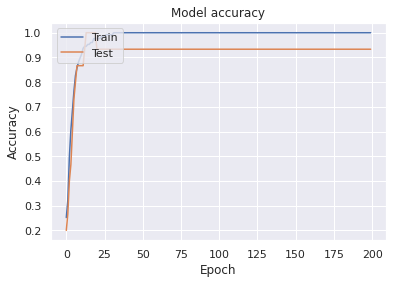

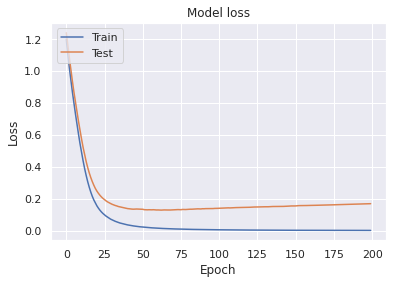

In [163]:
# Plot training & validation accuracy values
plt.plot(history3.history["accuracy"])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 40回程度で過学習

In [165]:
loss,accuracy = model.evaluate(X_train, y_train,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.018616169691085815
accuracy: 0.9929577708244324


In [167]:
best_model = load_model("model_wine.h5")
loss,accuracy = best_model.evaluate(X_train, y_train,verbose=0)
print("loss:",loss)
print("accuracy:",accuracy)

loss: 0.025436976924538612
accuracy: 0.9929577708244324
